In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.model_selection import RandomizedSearchCV

In [12]:
# Load the dataset
df = pd.read_csv(r"C:\Users\aldhu\Desktop\Projects\Data\ACME-HappinessSurvey2020.csv")

In [13]:
# Data exploration
print(df.describe())
print(df.info())

                Y          X1          X2          X3          X4          X5  \
count  126.000000  126.000000  126.000000  126.000000  126.000000  126.000000   
mean     0.547619    4.333333    2.531746    3.309524    3.746032    3.650794   
std      0.499714    0.800000    1.114892    1.023440    0.875776    1.147641   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    4.000000    2.000000    3.000000    3.000000    3.000000   
50%      1.000000    5.000000    3.000000    3.000000    4.000000    4.000000   
75%      1.000000    5.000000    3.000000    4.000000    4.000000    4.000000   
max      1.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

               X6  
count  126.000000  
mean     4.253968  
std      0.809311  
min      1.000000  
25%      4.000000  
50%      4.000000  
75%      5.000000  
max      5.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (tota

In [30]:
# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


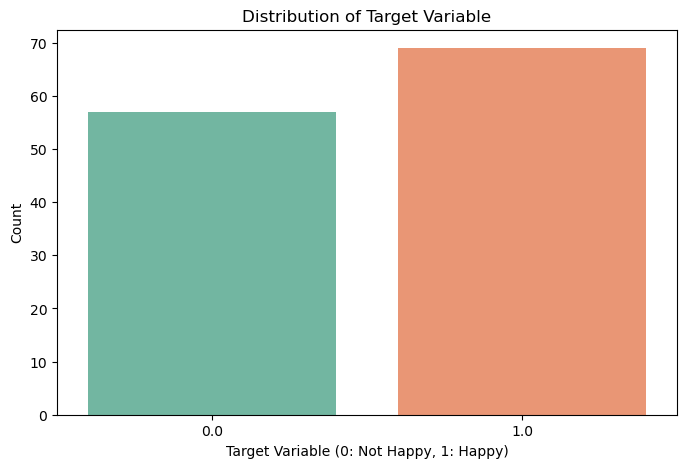

In [32]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.countplot(x='Y', data=df, palette='Set2')
plt.title("Distribution of Target Variable")
plt.xlabel("Target Variable (0: Not Happy, 1: Happy)")
plt.ylabel("Count")
plt.show()

In [14]:
# Scaling the features using Min-Max scaling
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [15]:
# Checking the distribution of target values
print(df['Y'].value_counts())

1.0    69
0.0    57
Name: Y, dtype: int64


In [33]:

# Split the data
X = df.drop(['Y'], axis=1)
y = df['Y']

In [34]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, shuffle=True, random_state=42
)


In [18]:
# Evaluating and printing model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(model.__class__.__name__ + ":")
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('F1-Score:', f1_score(y_test, y_pred))
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

In [35]:
# Train / testing models
models = [
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    LGBMClassifier(),
    KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    XGBClassifier(),
    DecisionTreeClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)

RandomForestClassifier:
Accuracy Score: 0.631578947368421
Precision Score: 0.5714285714285714
Recall Score: 0.8888888888888888
F1-Score: 0.6956521739130435
ROC AUC Score: 0.6444444444444444
ExtraTreesClassifier:
Accuracy Score: 0.7368421052631579
Precision Score: 0.7
Recall Score: 0.7777777777777778
F1-Score: 0.7368421052631577
ROC AUC Score: 0.7388888888888888
[LightGBM] [Info] Number of positive: 60, number of negative: 47
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560748 -> initscore=0.244197
[LightGBM] [Info] Start training from score 0.244197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

ROC AUC Score: 0.538888888888889
SVC:
Accuracy Score: 0.5263157894736842
Precision Score: 0.5
Recall Score: 0.8888888888888888
F1-Score: 0.64
ROC AUC Score: 0.5444444444444444
LogisticRegression:
Accuracy Score: 0.42105263157894735
Precision Score: 0.42857142857142855
Recall Score: 0.6666666666666666
F1-Score: 0.5217391304347826
ROC AUC Score: 0.43333333333333324
XGBClassifier:
Accuracy Score: 0.6842105263157895
Precision Score: 0.6363636363636364
Recall Score: 0.7777777777777778
F1-Score: 0.7000000000000001
ROC AUC Score: 0.6888888888888889
DecisionTreeClassifier:
Accuracy Score: 0.47368421052631576
Precision Score: 0.4666666666666667
Recall Score: 0.7777777777777778
F1-Score: 0.5833333333333334
ROC AUC Score: 0.4888888888888888


In [22]:
warnings.filterwarnings("ignore", category=UserWarning)
# Defining hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

K-Nearest Neighbors - Best Parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 9}
K-Nearest Neighbors - Best Accuracy: 0.5995670995670995


In [39]:
# Creating RandomizedSearchCV object for KNN
knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=knn_param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)
knn_random_search.fit(X_train, y_train)
print("K-Nearest Neighbors - Best Parameters:", knn_random_search.best_params_)
print("K-Nearest Neighbors - Best Accuracy:", knn_random_search.best_score_)

K-Nearest Neighbors - Best Parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 9}
K-Nearest Neighbors - Best Accuracy: 0.5995670995670995


In [37]:
# Define hyperparameter grid for Extra Trees
extra_trees_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

Extra Trees - Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Extra Trees - Best Accuracy: 0.635930735930736


In [40]:
# Create RandomizedSearchCV object for Extra Trees
extra_trees_random_search = RandomizedSearchCV(
    ExtraTreesClassifier(random_state=42),
    param_distributions=extra_trees_param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)
extra_trees_random_search.fit(X_train, y_train)
print("Extra Trees - Best Parameters:", extra_trees_random_search.best_params_)
print("Extra Trees - Best Accuracy:", extra_trees_random_search.best_score_)

Extra Trees - Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Extra Trees - Best Accuracy: 0.635930735930736


In [38]:
# Defining  hyperparameter grid for LGBM
lgbm_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [15, 31, 63],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5],
}

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 60, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560748 -> initscore=0.244197
[LightGBM] [Info] Start training from score 0.244197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [41]:
# Creating RandomizedSearchCV object
lgbm_random_search = RandomizedSearchCV(
    LGBMClassifier(random_state=42),
    param_distributions=lgbm_param_grid,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)
lgbm_random_search.fit(X_train, y_train)
print("LGBM - Best Parameters:", lgbm_random_search.best_params_)
print("LGBM - Best Accuracy:", lgbm_random_search.best_score_)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 60, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560748 -> initscore=0.244197
[LightGBM] [Info] Start training from score 0.244197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

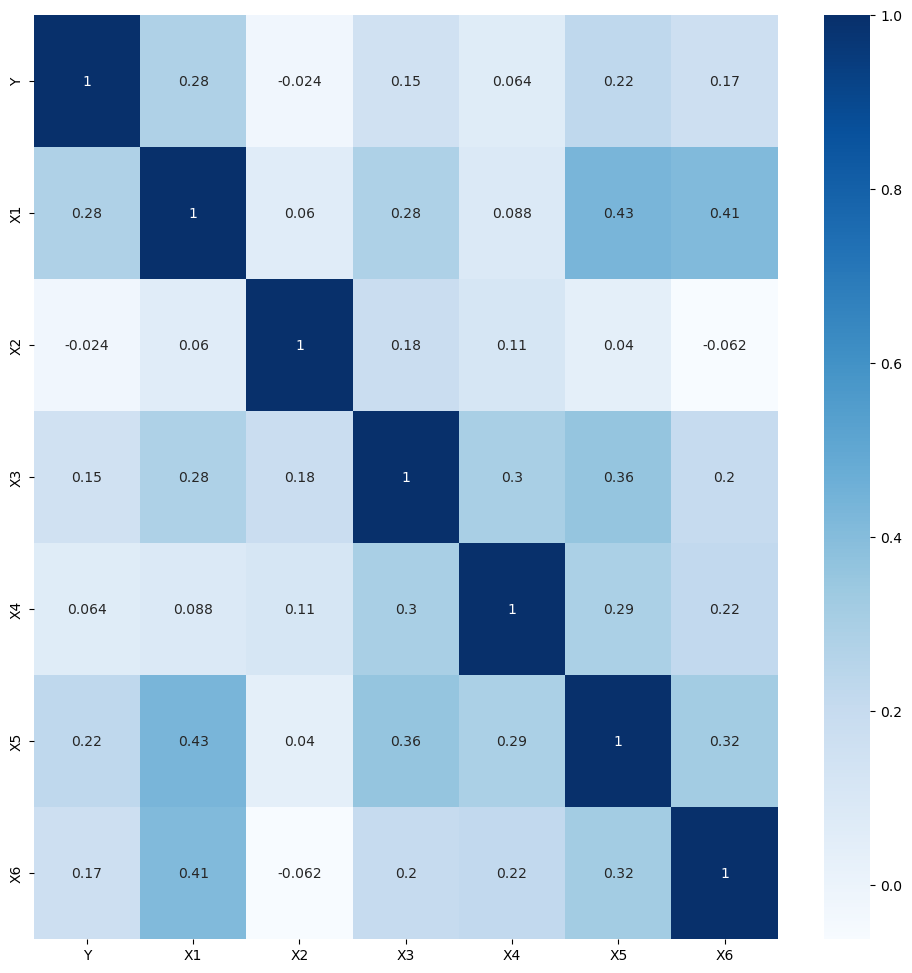

In [21]:
# Feature Selection
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Blues')
plt.show()

##### The heatmap above reveals that features X1, X5, and X6 exhibit stronger correlations with the target variable.
##### We will retain these features and proceed to train our models, with the expectation of potentially achieving better accuracy.

In [ ]:
X = df[['X1', 'X5', 'X6']]
y = df['Y']

In [42]:
# Re-splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, shuffle=True, random_state=42
)

In [43]:
# Re-training and testing models with selected features
for model in models:
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test)

RandomForestClassifier:
Accuracy Score: 0.631578947368421
Precision Score: 0.5833333333333334
Recall Score: 0.7777777777777778
F1-Score: 0.6666666666666666
ROC AUC Score: 0.6388888888888888
ExtraTreesClassifier:
Accuracy Score: 0.6842105263157895
Precision Score: 0.6363636363636364
Recall Score: 0.7777777777777778
F1-Score: 0.7000000000000001
ROC AUC Score: 0.6888888888888889
[LightGBM] [Info] Number of positive: 60, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 107, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560748 -> initscore=0.244197
[LightGBM] [Info] Start training from score 0.244197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

KNeighborsClassifier:
Accuracy Score: 0.5263157894736842
Precision Score: 0.5
Recall Score: 0.7777777777777778
F1-Score: 0.6086956521739131
ROC AUC Score: 0.538888888888889
SVC:
Accuracy Score: 0.5263157894736842
Precision Score: 0.5
Recall Score: 0.8888888888888888
F1-Score: 0.64
ROC AUC Score: 0.5444444444444444
LogisticRegression:
Accuracy Score: 0.42105263157894735
Precision Score: 0.42857142857142855
Recall Score: 0.6666666666666666
F1-Score: 0.5217391304347826
ROC AUC Score: 0.43333333333333324
XGBClassifier:
Accuracy Score: 0.6842105263157895
Precision Score: 0.6363636363636364
Recall Score: 0.7777777777777778
F1-Score: 0.7000000000000001
ROC AUC Score: 0.6888888888888889
DecisionTreeClassifier:
Accuracy Score: 0.47368421052631576
Precision Score: 0.4666666666666667
Recall Score: 0.7777777777777778
F1-Score: 0.5833333333333334
ROC AUC Score: 0.4888888888888888


##### From the results above, it's evident that we achieve similar accuracy using only three features: X1, X5, and X6. Consequently, we can safely drop X2, X3, and X4 when collecting surveys.

#### **Conclusion:**

- **Most Important Feature**: 
  Based on our feature selection, the question associated with `X1` was identified as the most important feature, having the highest importance score of 0.28.

- **Minimal Set of Attributes**: 
  To preserve the most information about the problem while maximizing the predictability of our data, we would prioritize the questions associated with attributes `X1`, `X5`, and `X6` given their higher importance scores.

- **Questions for Consideration in Future Surveys**: 
  The question corresponding to `X2` has a negative importance score of -0.024. This suggests that it may not be contributing positively to our model's predictions and could be a candidate for removal in our next survey to streamline the process. 

By identifying and focusing on key questions, we can make the survey process more efficient without compromising the quality of the insights we derive.